The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles. Four &quot;Corgie&quot; model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars.<br>
This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.<br>
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
 
Link to the case file: vehicle.csv
 
The points distribution for this case is as follows:<br>
1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers <br>
2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why <br>
3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance)<br>
4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy.

In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# looking at the first five rows to know if there are any other specific text format present in the dataset
data_set= open('vehicle.csv','r')
print('\033[1mBook file structure\033[0m\n')
for i in range(0,5):
    print(data_set.readline())

Book file structure

compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class

95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van

91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van

104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,car

93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van



In [3]:
cars_data=pd.read_csv('vehicle.csv')
cars_data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [4]:
print(cars_data.shape,'\n')
display(cars_data.info(),cars_data.isna().sum())

(846, 19) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollo

None

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [5]:
#Replacing nan to mean
cars_data.fillna(cars_data.mean(),inplace=True)
cars_data.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 1. Data pre-processing - Understand the data and treat missing values (Use box plot), outliers

#### Checking distribution of dependent variable, class

In [6]:
import seaborn as sns
from IPython.display import display
data_df=cars_data
target_var='class'

,class,count,prop
0,car,429,0.507092
1,bus,218,0.257683
2,van,199,0.235225


<function matplotlib.pyplot.show(*args, **kw)>

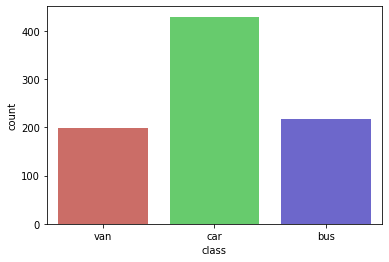

In [7]:
# ploting the data distribution for the target columns "class"
freq = data_df[target_var].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
display(freq)
sns.countplot(x=target_var,data=data_df,palette='hls')
plt.show

### Check data distribution using summary statistics and findings

In [8]:
data_df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
compactness,846,NaN,NaN,NaN,93.6785,8.23447,73,87,93,100,119
circularity,846,NaN,NaN,NaN,44.8288,6.13394,33,40,44,49,59
distance_circularity,846,NaN,NaN,NaN,82.1105,15.7409,40,70,80,98,112
radius_ratio,846,NaN,NaN,NaN,168.888,33.401,104,141,168,195,333
pr.axis_aspect_ratio,846,NaN,NaN,NaN,61.6789,7.88212,47,57,61,65,138
max.length_aspect_ratio,846,NaN,NaN,NaN,8.56738,4.60122,2,7,8,10,55
scatter_ratio,846,NaN,NaN,NaN,168.902,33.1952,112,147,157,198,265
elongatedness,846,NaN,NaN,NaN,40.9337,7.81156,26,33,43,46,61
pr.axis_rectangularity,846,NaN,NaN,NaN,20.5824,2.58833,17,19,20,23,29
max.length_rectangularity,846,NaN,NaN,NaN,147.999,14.5157,118,137,146,159,188


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

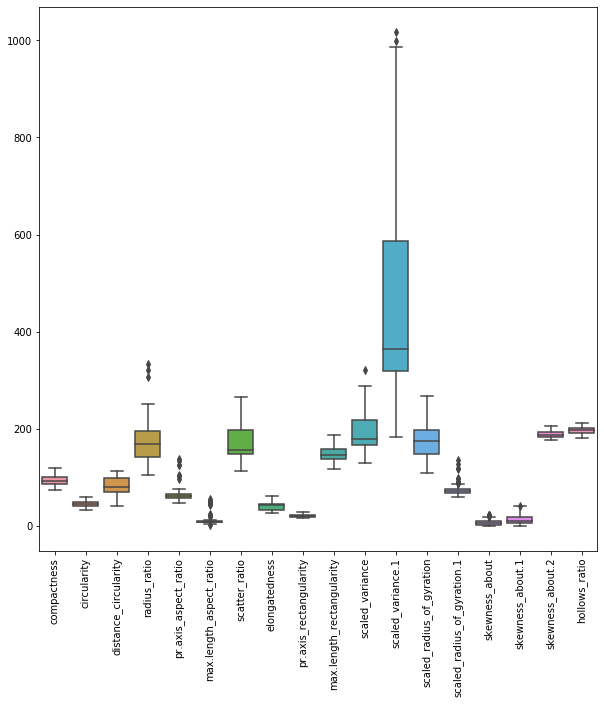

In [9]:
# Outliers
plt.figure(figsize=(10,10))
sns.boxplot( data=data_df)
plt.xticks(rotation=90)

### 2. Understanding the attributes - Find relationship between different attributes (Independent variables) and choose carefully which all attributes have to be a part of the analysis and why

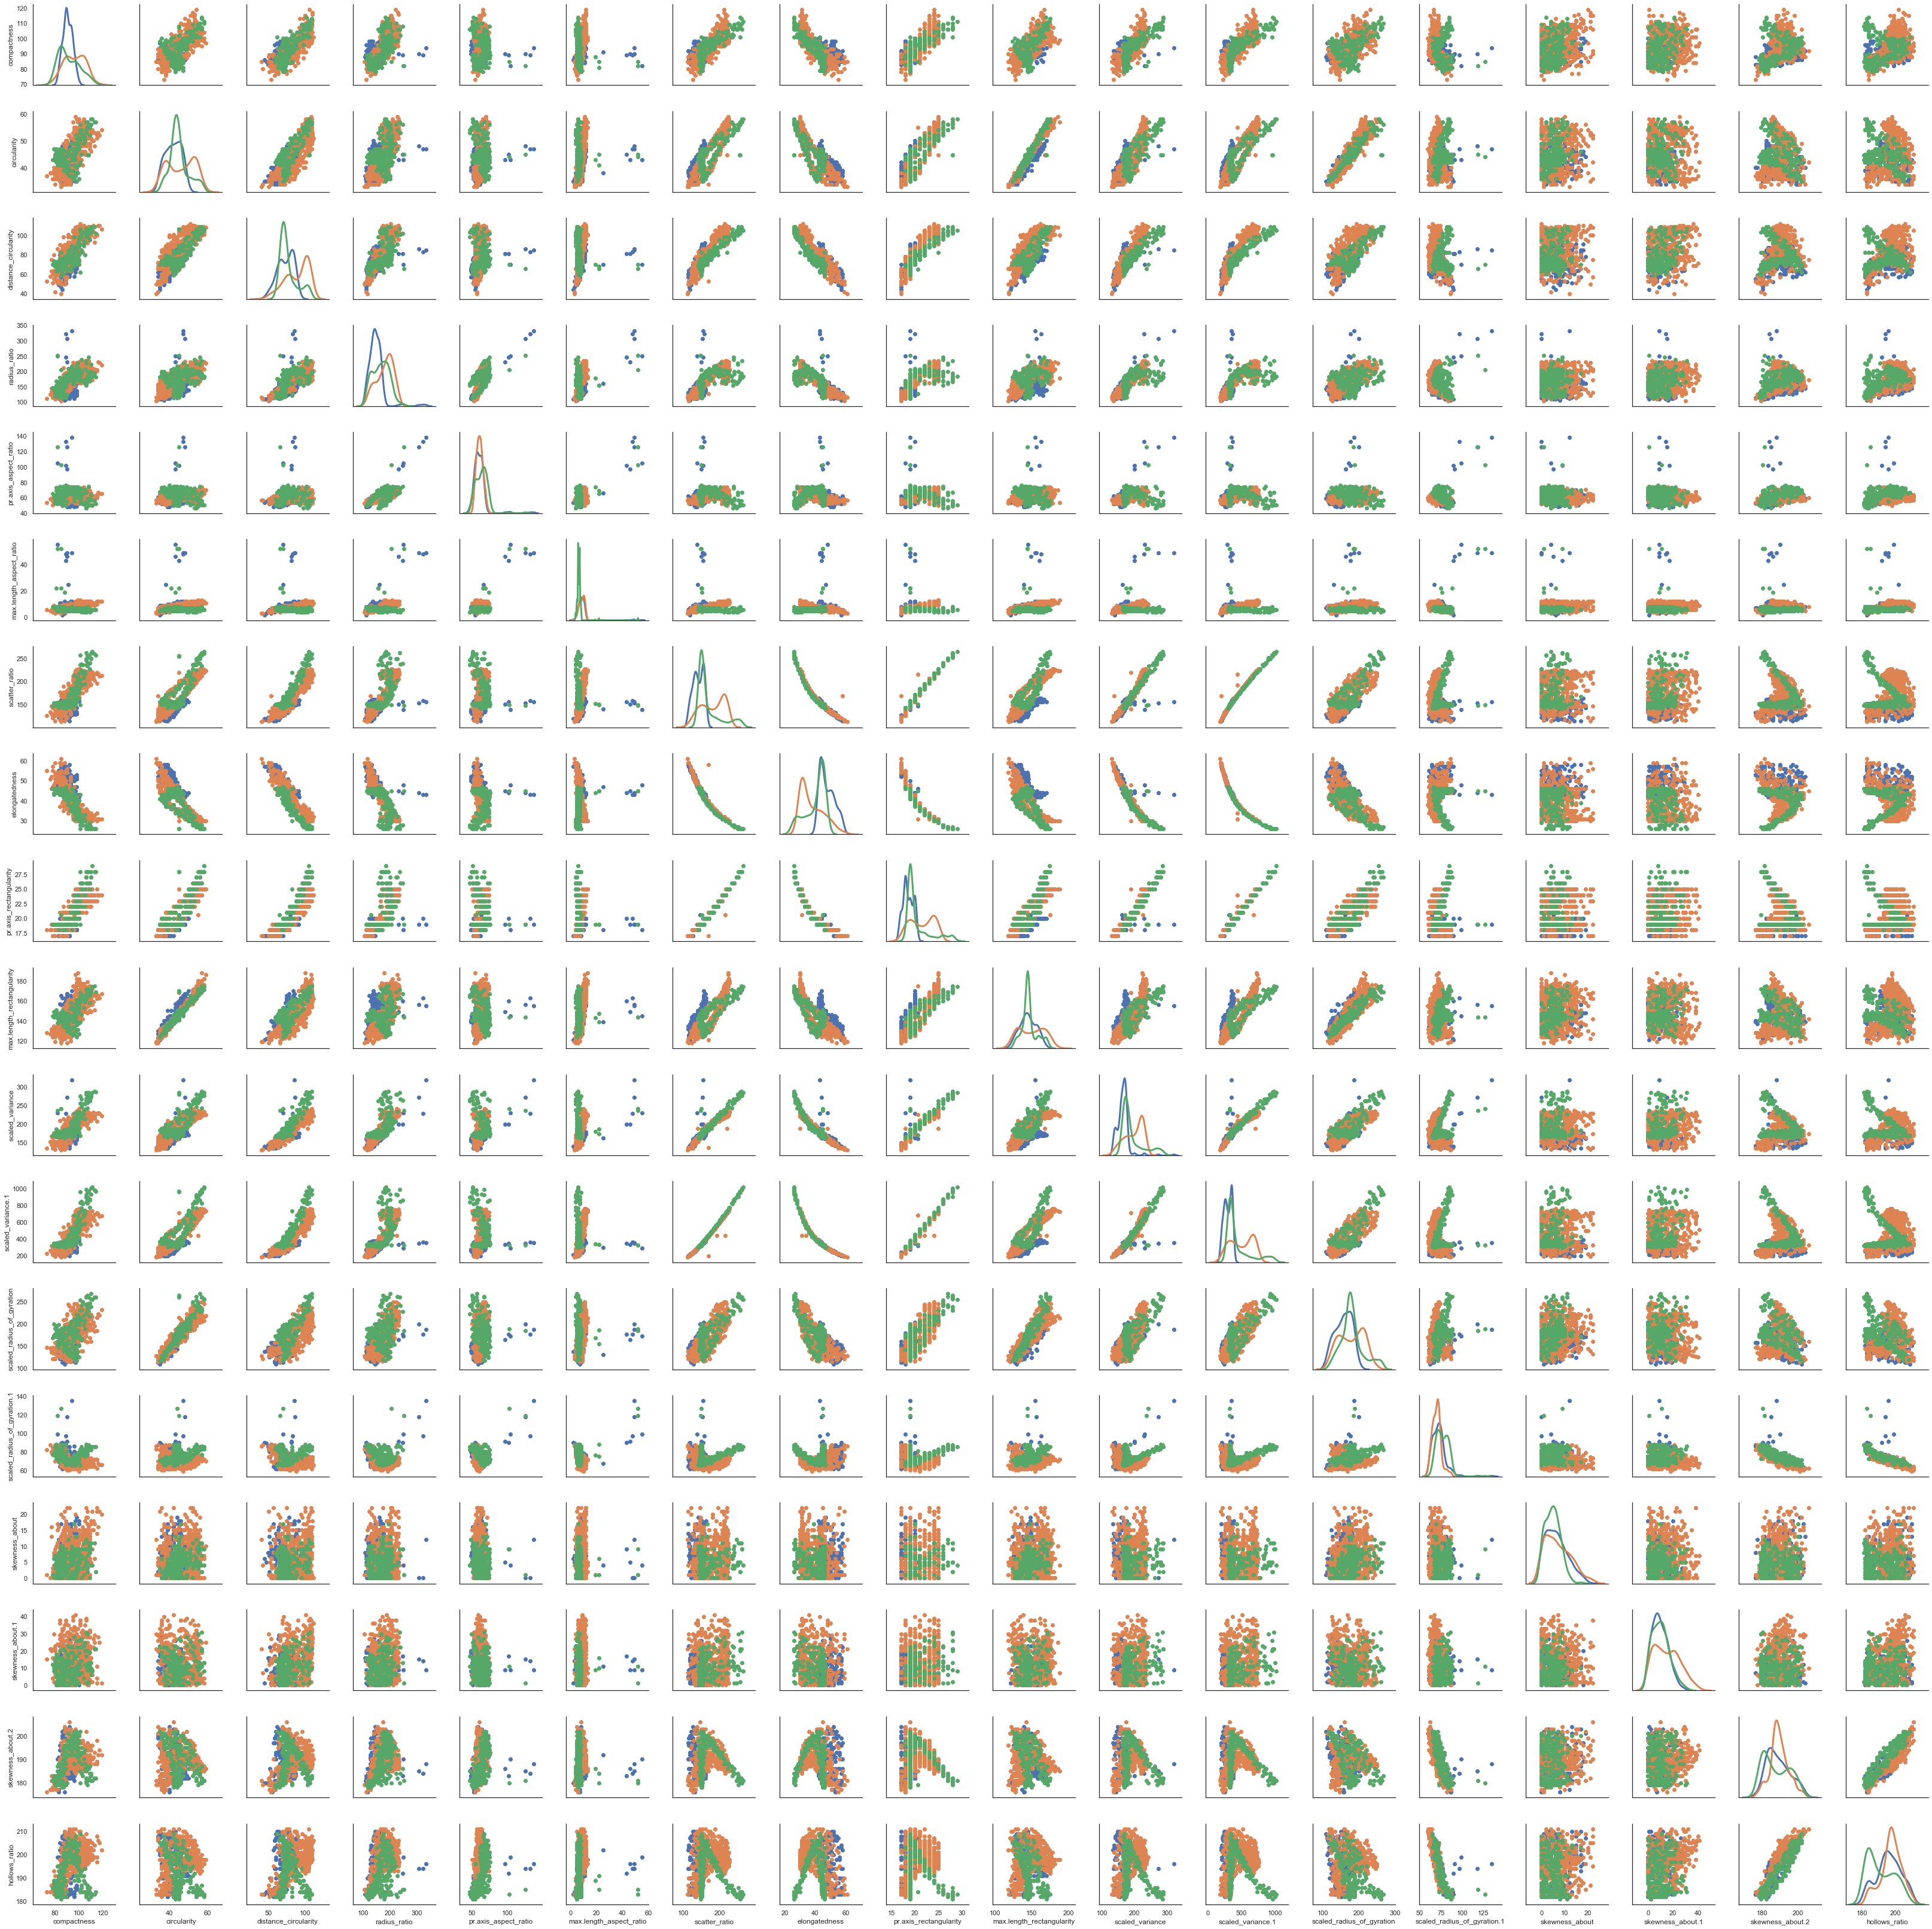

In [10]:
#Oberving the clusters and distribution with the help of pairplot/pairgrid
sns.set(style="white")
df = data_df
g = sns.PairGrid(df, hue = target_var,diag_sharey=False)
g.map_lower(plt.scatter)
#g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw=3)

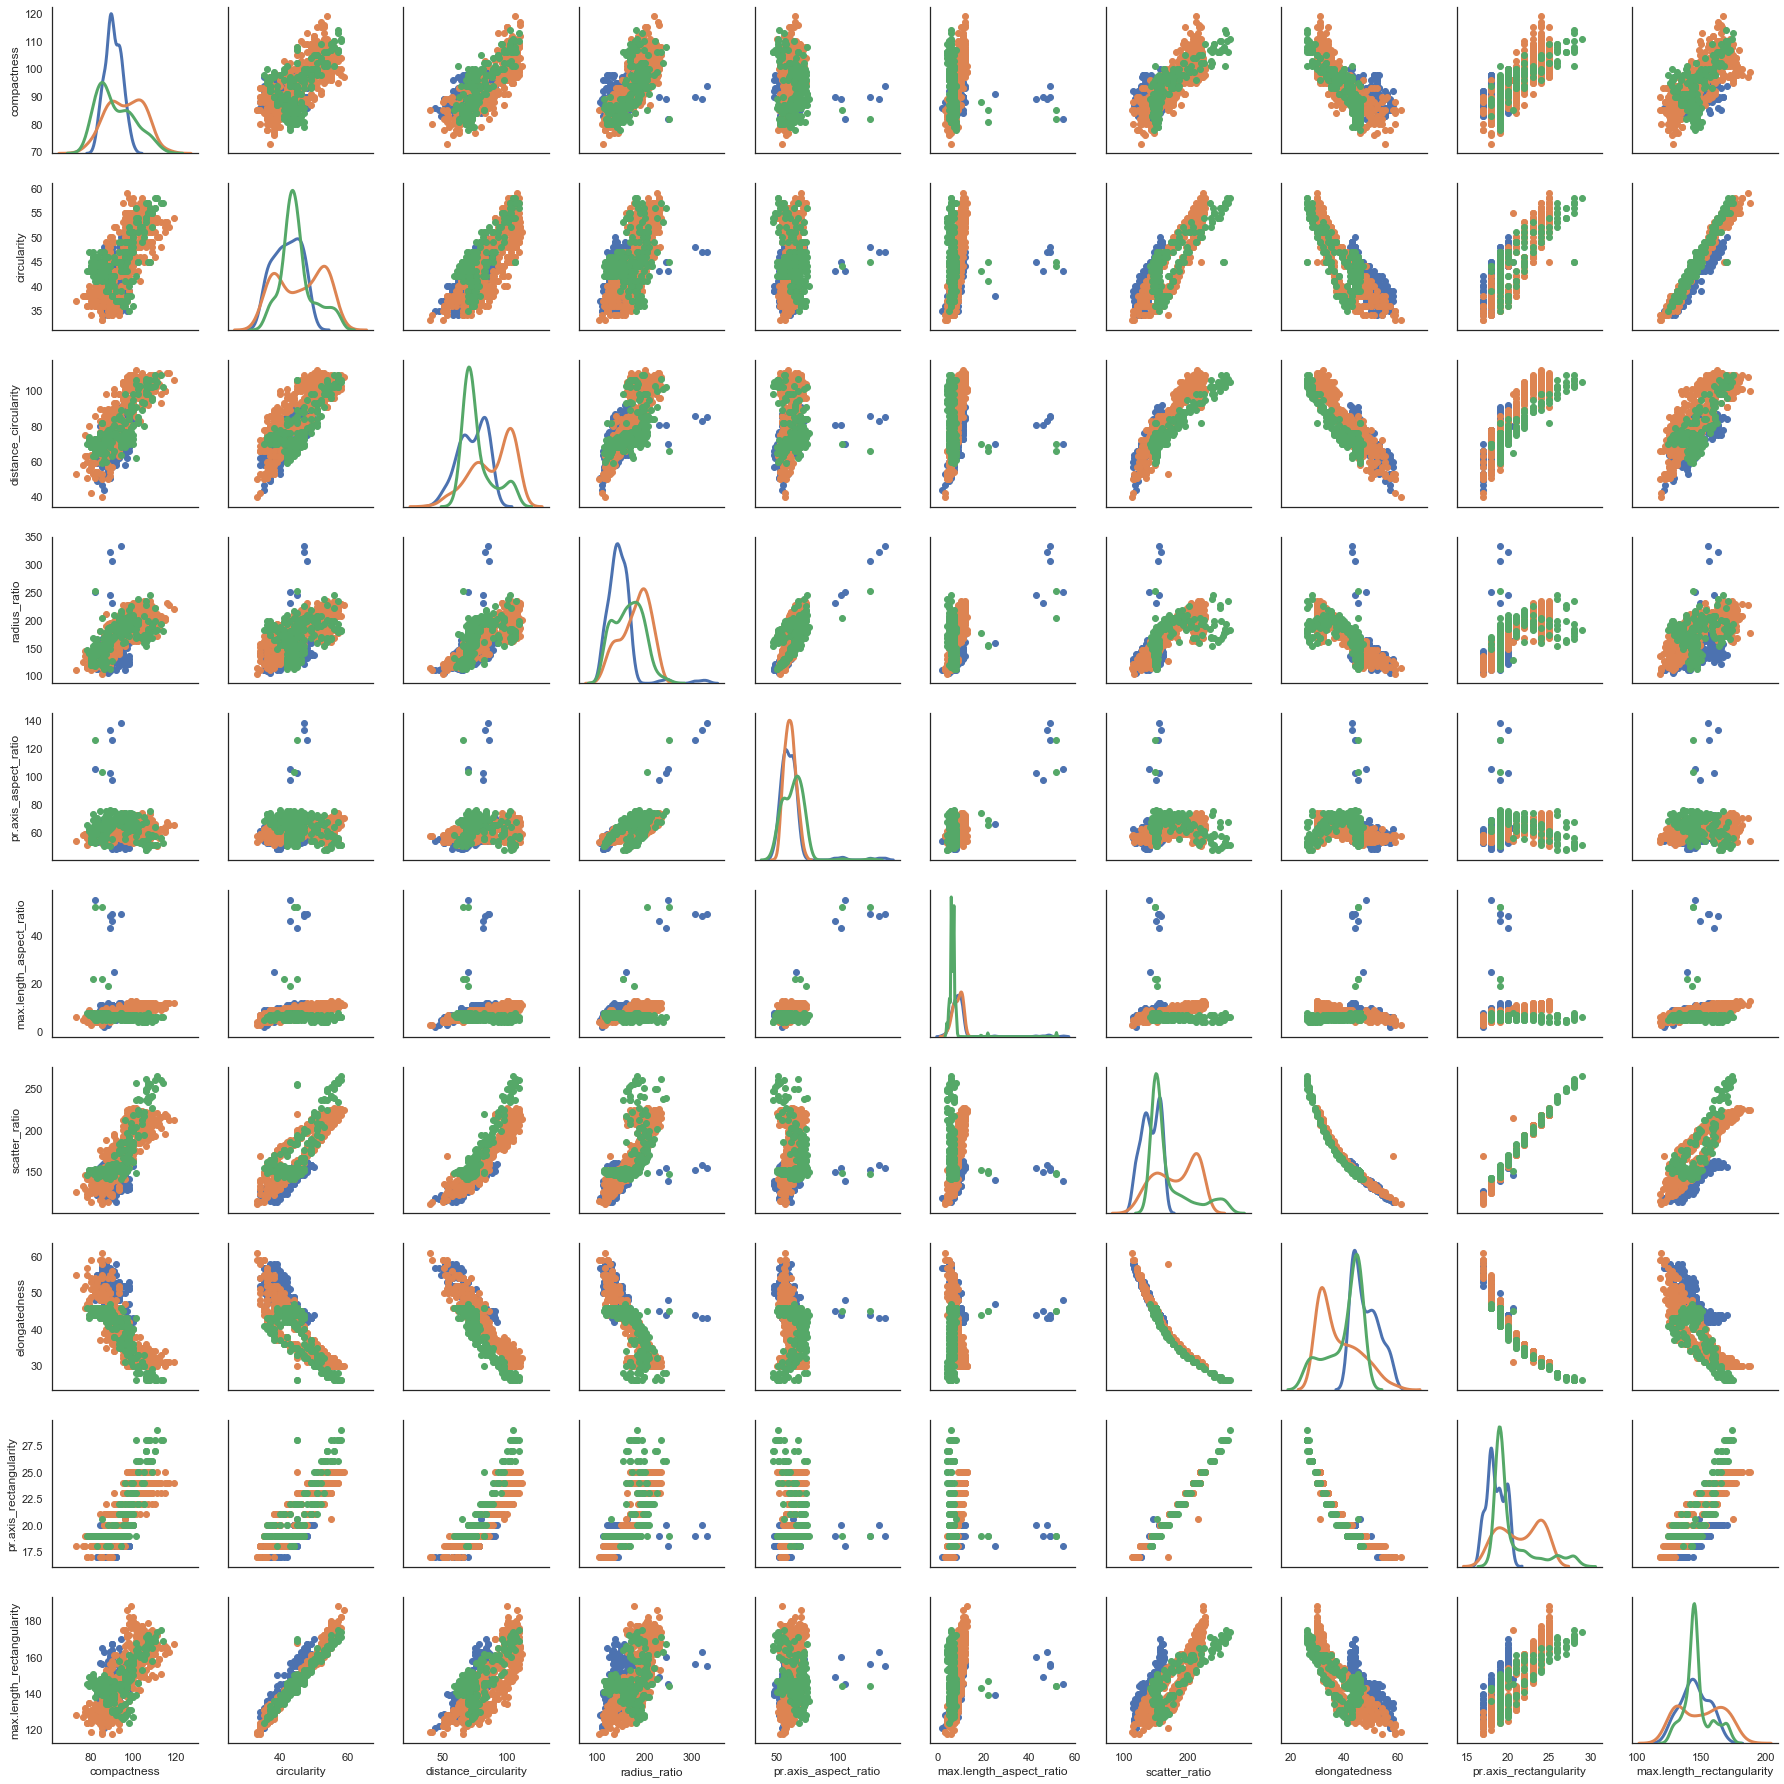

In [11]:
#Oberving the clusters and distribution with the help of pairplot/pairgrid for first 10 features
sns.set(style="white")
data_dia = data_df[target_var]
data = data_df.drop(columns=[target_var])

df = pd.concat([data_dia,data.iloc[:,0:10]],axis=1)
g = sns.PairGrid(df, hue = target_var,diag_sharey=False)
g.map_lower(plt.scatter)
#g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw=3)

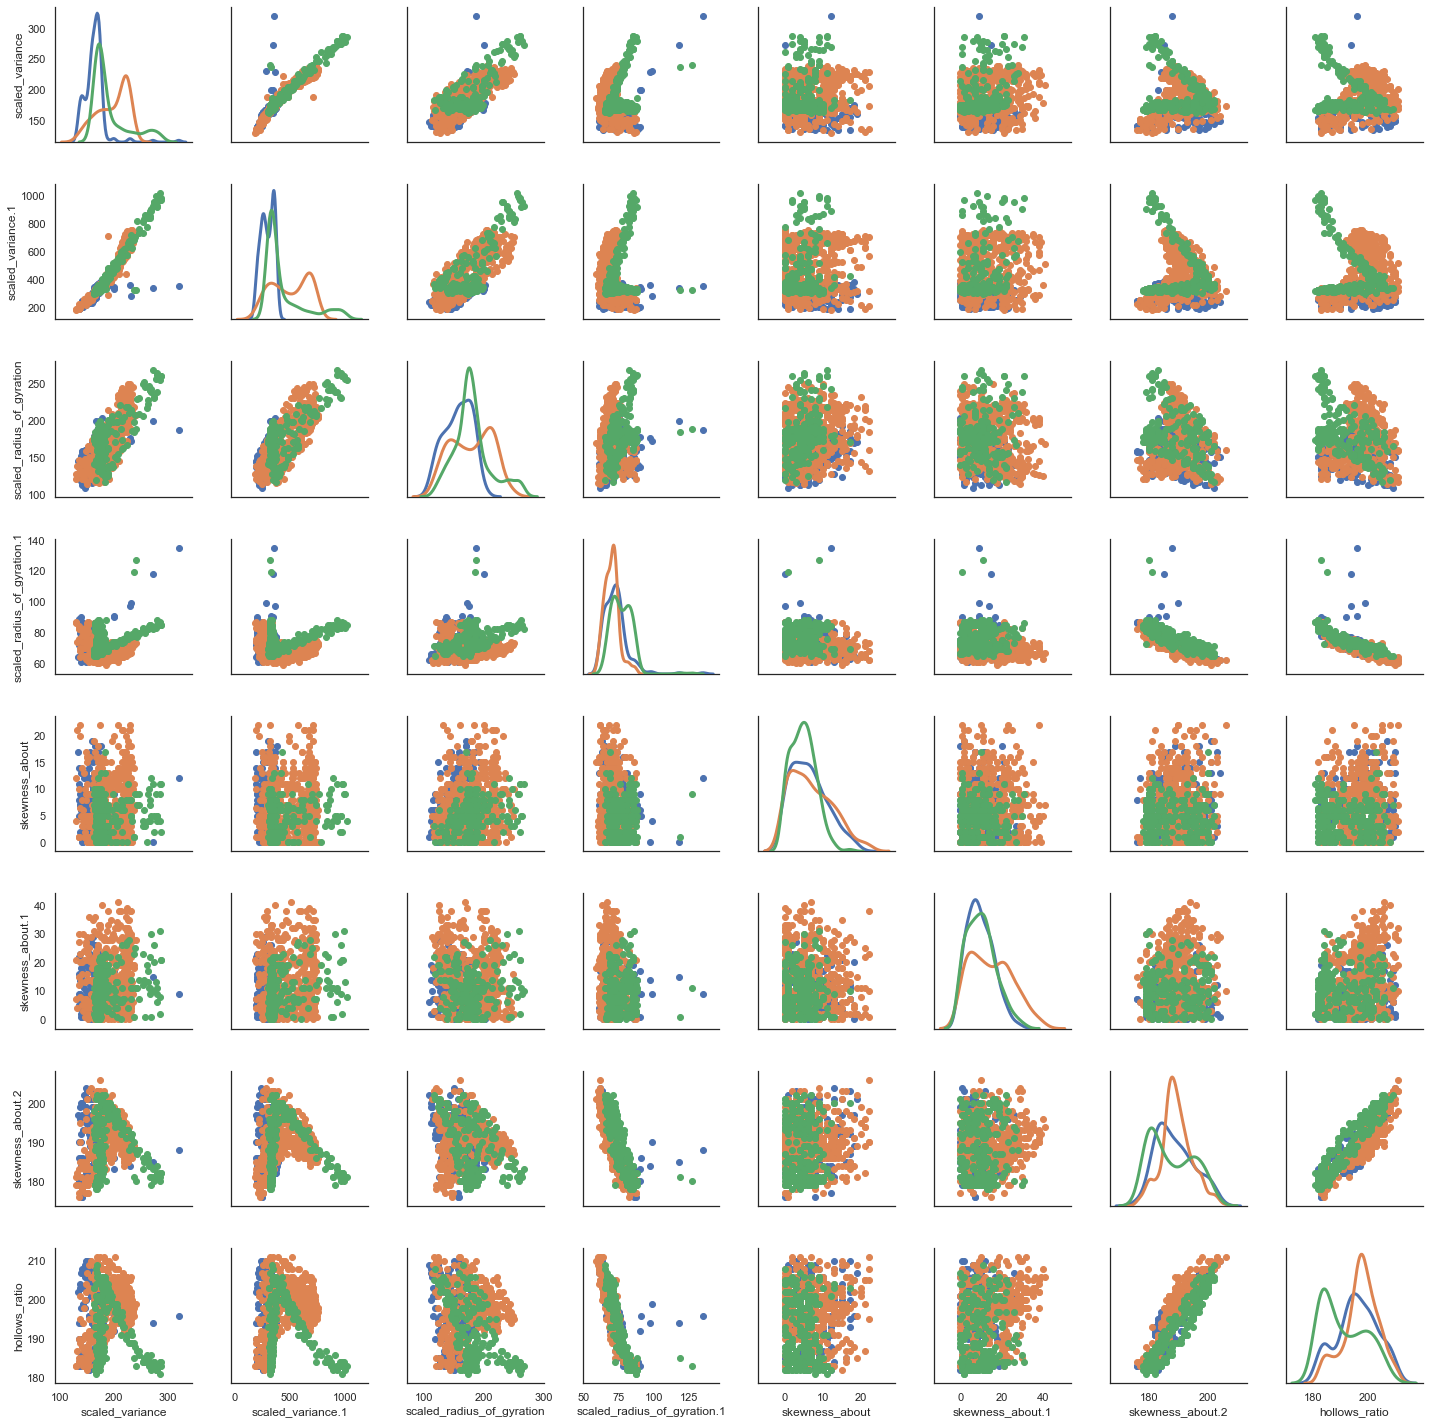

In [12]:
#Oberving the clusters and distribution with the help of pairplot/pairgrid for remaining features
sns.set(style="white")
data_dia = data_df[target_var]
data = data_df.drop(columns=[target_var])

df = pd.concat([data_dia,data.iloc[:,10:]],axis=1)
g = sns.PairGrid(df, hue = target_var,diag_sharey=False)
g.map_lower(plt.scatter)
#g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw=3)

In [13]:
data_df.corr()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
compactness,1.000000,0.685421,0.789909,0.689840,0.091704,0.148249,0.812235,-0.788643,0.813636,0.676143,0.762770,0.815901,0.585156,-0.250071,0.235687,0.157387,0.298526,0.365552
circularity,0.685421,1.000000,0.793016,0.620967,0.153362,0.251208,0.848207,-0.821901,0.844972,0.961943,0.796822,0.838525,0.926888,0.052642,0.144394,-0.011851,-0.105645,0.045318
distance_circularity,0.789909,0.793016,1.000000,0.767079,0.158397,0.264550,0.904400,-0.911435,0.893128,0.774669,0.861980,0.887328,0.705953,-0.225852,0.113813,0.265553,0.145563,0.332095
radius_ratio,0.689840,0.620967,0.767079,1.000000,0.663559,0.450036,0.734228,-0.789795,0.708285,0.569205,0.794041,0.720150,0.536536,-0.180819,0.048720,0.173832,0.382129,0.471262
pr.axis_aspect_ratio,0.091704,0.153362,0.158397,0.663559,1.000000,0.648704,0.103715,-0.183264,0.079395,0.127128,0.273414,0.089620,0.122111,0.152776,-0.058481,-0.032134,0.239849,0.267724
max.length_aspect_ratio,0.148249,0.251208,0.264550,0.450036,0.648704,1.000000,0.165967,-0.180041,0.161592,0.305943,0.318955,0.143713,0.189704,0.295574,0.015439,0.043489,-0.026180,0.143919
scatter_ratio,0.812235,0.848207,0.904400,0.734228,0.103715,0.165967,1.000000,-0.970723,0.989370,0.808356,0.948296,0.993784,0.799266,-0.027985,0.074308,0.213127,0.005167,0.118448
elongatedness,-0.788643,-0.821901,-0.911435,-0.789795,-0.183264,-0.180041,-0.970723,1.000000,-0.949077,-0.775519,-0.936715,-0.955074,-0.766029,0.103481,-0.051997,-0.185691,-0.114727,-0.216719
pr.axis_rectangularity,0.813636,0.844972,0.893128,0.708285,0.079395,0.161592,0.989370,-0.949077,1.000000,0.811447,0.934568,0.989490,0.797068,-0.015676,0.082974,0.214734,-0.018990,0.099191
max.length_rectangularity,0.676143,0.961943,0.774669,0.569205,0.127128,0.305943,0.808356,-0.775519,0.811447,1.000000,0.745209,0.796018,0.866425,0.041220,0.135745,0.001658,-0.104254,0.076770


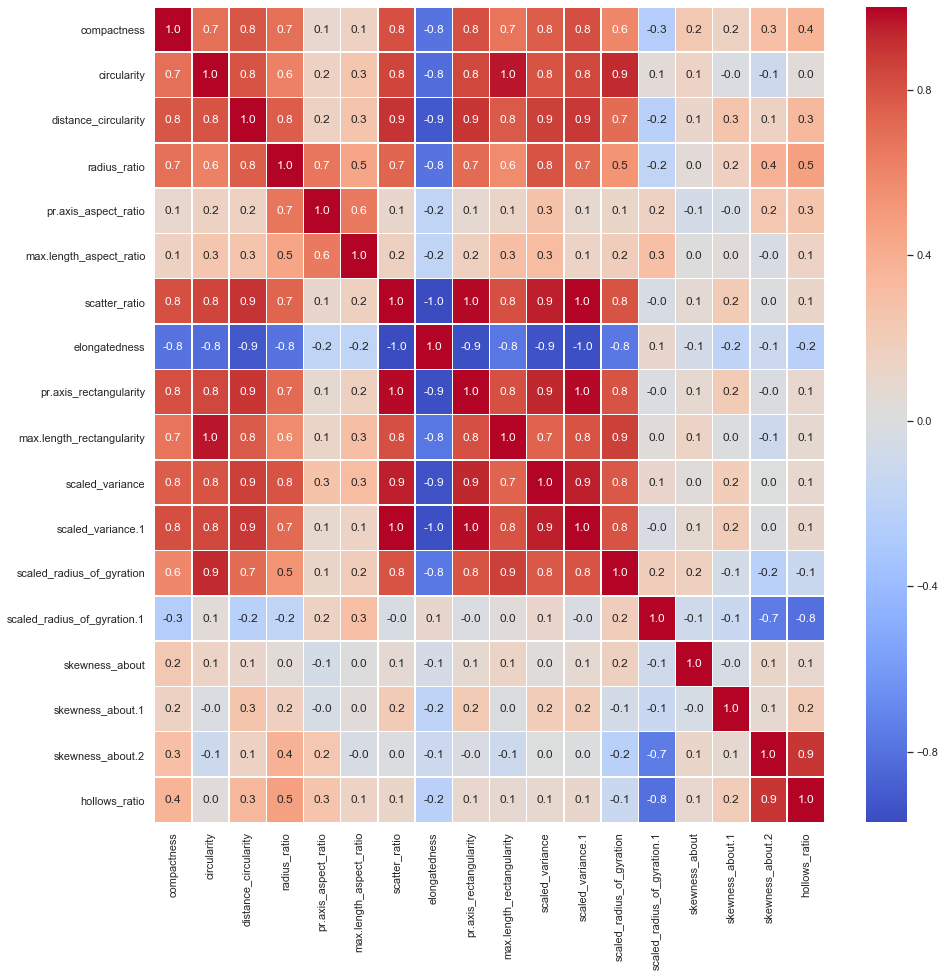

In [14]:
#correlation map
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data_df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap = "coolwarm")

### From the Pairplot/Gridplot, pd.corr(), outliers box plot and description stats, i have observed following
1) The range of data in the dataset are from single digit to 4 degits, thus may require scaling.<br>
2) There are few outliers, which i am assuming not to treat for the model (PCA).<br>
3) From the diagnal kde plot, i can see that feature "elongatedness" shows a good split of target compaired to other features.<br>
4) From correlation matrix, i see that few of the features are higly corelated, example: hollow_ration and skewness_about.2, distance_circularity and scatter_ratio,elongatedness,axis_aspect_ratio,scaled_variance,scaled_variance.1

### 3. Use PCA from scikit learn and elbow plot to find out reduced number of dimension (which covers more than 95% of the variance)

In [15]:
#maping the target to integer/categorical values that can be recognised by the model
cars_data['class']=cars_data['class'].map(lambda x:0 if x=='bus' else(1 if x=='car' else 2))

In [16]:
### Spliting the dataset to X and y

X=cars_data.drop(columns=['class'])
y=cars_data['class']

In [17]:
#standardize the data
from scipy.stats import zscore
X= X.apply(zscore)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18)
pca.fit(X)
X_pca = pca.transform(X)

In [19]:
display(X_pca.shape,
        np.cumsum(pca.explained_variance_ratio_))

(846, 18)

array([0.52206485, 0.68942539, 0.79504921, 0.86054241, 0.9114363 ,
       0.94136087, 0.96125769, 0.97355767, 0.98243806, 0.98752726,
       0.99122151, 0.99377159, 0.99573606, 0.99721818, 0.99834845,
       0.99931628, 0.99982865, 1.        ])

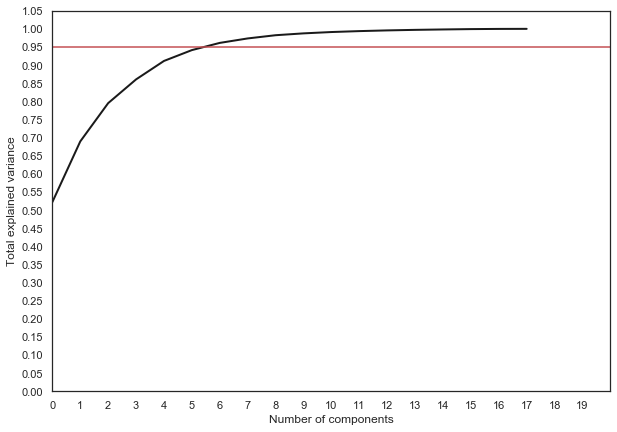

In [20]:
plt.figure(figsize=(10,7))

plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)

plt.xlabel('Number of components')
plt.ylabel('Total explained variance')

plt.xlim(0, 20)
plt.xticks(np.arange(0, 20, 1))
plt.yticks(np.arange(0, 1.1, 0.05))

plt.axvline(21, c='b')
plt.axhline(0.95, c='r')

plt.show()

#### From the explained variance ration, i observe that 7 componets gives 96.126% of overall data variance in the dataset out of 18 features, thus i will consider n_components =7

### 4. Use Support vector machines and use grid search (try C values - 0.01, 0.05, 0.5, 1 and kernel = linear, rbf) and find out the best hyper parameters and do cross validation to find the accuracy.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,
                                                    random_state=42)
display(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(592, 18)

(592,)

(254, 18)

(254,)

In [22]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [23]:
 param_grid = [{
     'kernel': ['linear', 'rbf'],
     'C': [0.01,0.05,0.5,1.0]}]

In [24]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [25]:
pca = PCA(n_components=7)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [26]:
gs.fit(pca.transform(X_train), y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=4,
             param_grid=[{'C': [0.01, 0.05, 0.5, 1.0],
                          'kernel': ['linear', 'rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [27]:
# Best hyper parameters
gs.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
gs.best_score_ 

0.8986486486486487

In [29]:
best_scv=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
             decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
             kernel='rbf', max_iter=-1, probability=False, random_state=None,
             shrinking=True, tol=0.001, verbose=False)
best_scv.fit(pca.transform(X_train), y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [30]:
prediction = best_scv.predict(pca.transform(X_test))

In [42]:
x_con=pd.concat([X_test,y_test],axis=1)
x_con['predict_test']=prediction
print(X_test.shape,y_test.shape,len(prediction),x_con.shape)
x_con.head()

(254, 18) (254,) 254 (254, 20)


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class,predict_test
39,-1.540595,0.027931,-0.896950,0.003352,1.437150,-0.558308,-0.539607,0.392762,-0.611739,-0.137782,-0.498811,-0.586856,0.347105,0.341941,0.129731,-1.411949,-0.962755,-0.892121,0,0
250,0.160580,-1.113935,-1.024082,-1.284797,-1.228684,-0.123383,-1.082175,1.417491,-0.998318,-0.551374,-0.977484,-1.057502,-1.067105,0.743868,0.946016,-0.515642,-0.800114,-1.699181,2,2
314,-0.446982,-0.461440,-1.214781,-1.284797,-0.847851,-0.340845,-0.509465,0.520853,-0.611739,-0.413510,-0.498811,-0.586856,-0.052563,1.145795,-1.298768,0.268627,-1.450677,-1.564671,0,0
96,-0.568495,-0.461440,-0.134154,-0.535873,0.040761,-0.558308,-0.750606,0.648945,-0.611739,-0.620306,-0.722192,-0.745628,-0.144794,0.207965,2.170443,0.044550,-0.637474,-0.892121,1,1
198,-1.540595,0.191055,-0.706251,-1.164969,-0.720906,-0.340845,-0.479322,0.392762,-0.611739,0.069013,-0.530723,-0.552834,0.500824,1.145795,-0.686554,0.156589,-1.450677,-1.295651,0,0


In [43]:
#cross validation to find the accuracy
pd.crosstab(x_con.predict_test,x_con['class'])

class,0,1,2
predict_test,,,
0,67,2,1
1,9,109,4
2,2,7,53


In [45]:
#maping the target to integer/categorical values that can be recognised by the model
#cars_data['class']=cars_data['class'].map(lambda x:0 if x=='bus' else(1 if x=='car' else 2))

x_con['class']=x_con['class'].map(lambda x:'bus' if x==0 else('car' if x==1 else 'van'))
x_con['predict_test']=x_con['predict_test'].map(lambda x:'bus' if x==0 else('car' if x==1 else 'van'))
pd.crosstab(x_con.predict_test,x_con['class'])

class,bus,car,van
predict_test,,,
bus,67,2,1
car,9,109,4
van,2,7,53


In [44]:
print("Accuracy on test dataset:",best_scv.score(pca.transform(X_test), y_test))

Accuracy on test dataset: 0.9015748031496063
